In [16]:
#importing some needed libraries for analysis...
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn import  datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from KNN import KNN
import matplotlib.pyplot as plt
from knn_module import KNN_from_scratch
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree


In [2]:
banknote=fetch_ucirepo(id=267)#get our dataset from Ucirepo

In [3]:
x = banknote.data.features
y = banknote.data.targets
df=pd.DataFrame(x)
df['class']=y
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Text(0.5, 1.08, 'Features Pair Plot')

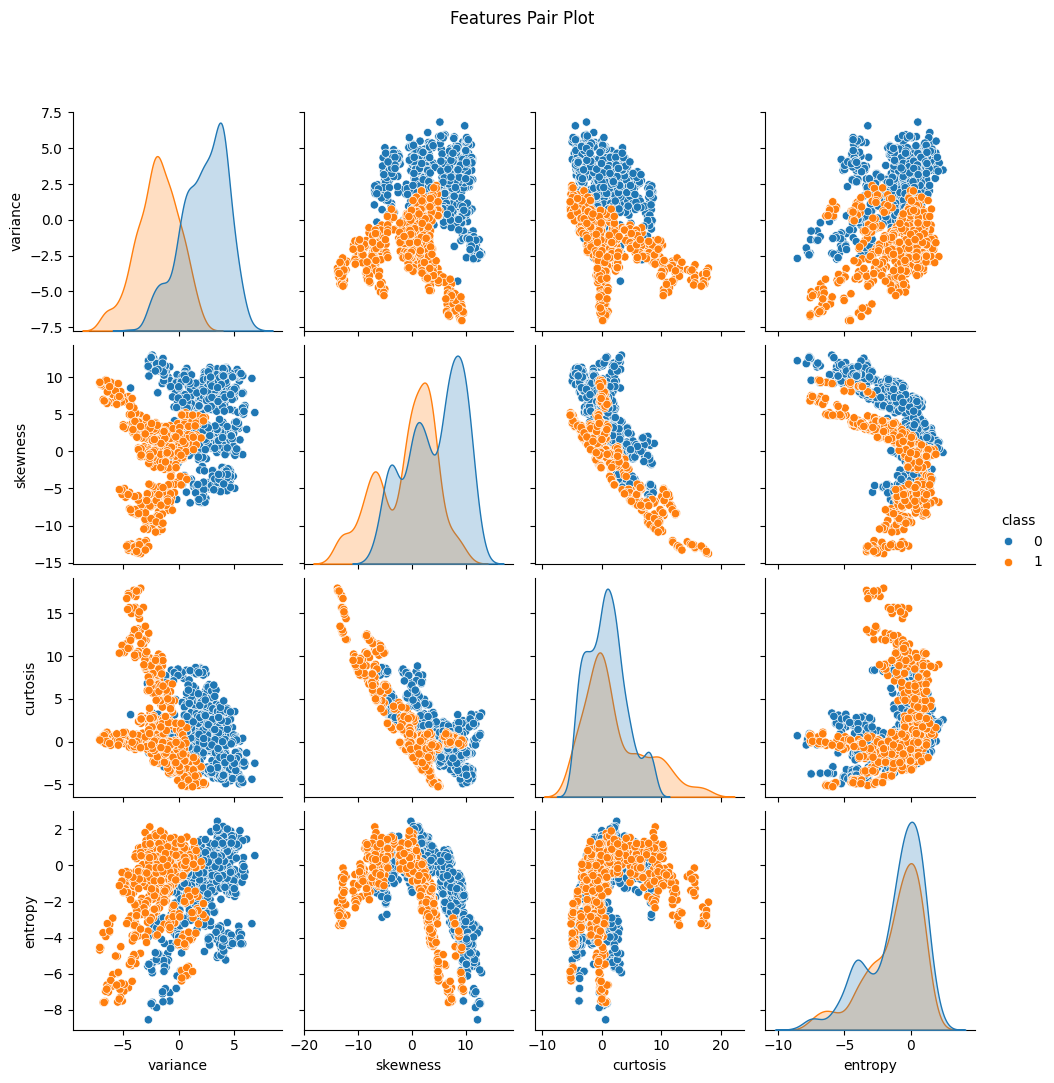

In [4]:
plot=sns.pairplot(df,hue='class')
plot.fig.suptitle('Features Pair Plot', y=1.08) # plotting graph of  data features

In [4]:
# Load dataset into DataFrame 'a', separate class labels into 'b'
a=df
b=a.pop("class")
# Split data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test= train_test_split(a, b,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [6]:
# Create and train Decision Tree Classifier with chosen parameters
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=5,random_state=0,max_depth=6)
clf=clf.fit(x_train,y_train)

In [26]:
# Display the parameters used in the trained classifier
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [9]:
# Predict class labels for test set
predictions=clf.predict(x_test)
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [10]:
# Predict class probabilities for test set
clf.predict_proba(x_test)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.90909091, 0.09090909],
       [0.

In [11]:
# Calculate accuracy score for test predictions
accuracy_score(y_test,predictions)

0.9927272727272727

In [12]:
# Generate confusion matrix to evaluate predictions
cm=confusion_matrix(y_test,predictions)
cm

array([[155,   2],
       [  0, 118]])

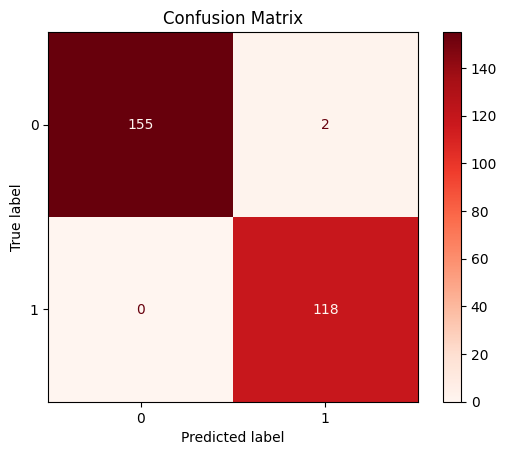

In [22]:
# Generate confusion matrix to evaluate predictions
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

In [24]:
# Display detailed classification report (precision, recall, f1-score)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [25]:
# Display importance scores for each feature used by the classifier
clf.feature_importances_

array([0.60241559, 0.23068226, 0.15192493, 0.01497723])

In [26]:
# Organize feature importance into a DataFrame and sort by importance
feature_importance = pd.DataFrame(clf.feature_importances_, index = a.columns).sort_values(0, ascending=False)
feature_importance

,0
variance,0.602416
skewness,0.230682
curtosis,0.151925
entropy,0.014977


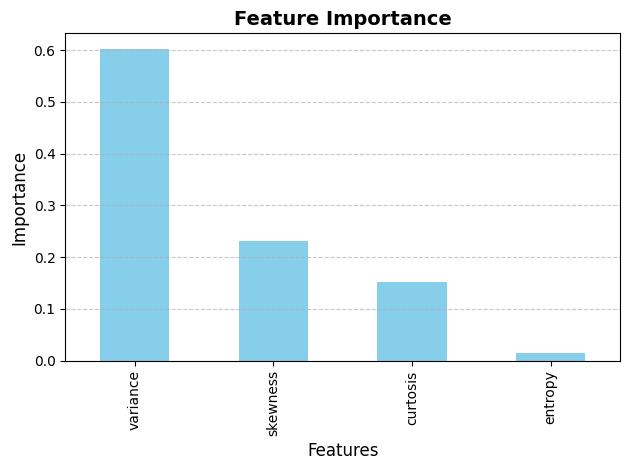

In [27]:
# Plot feature importance chart with clear labels and styling
ax = feature_importance.plot(kind='bar', legend=False, color='skyblue')
ax.set_title('Feature Importance', fontsize=14, fontweight='bold')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Importance', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

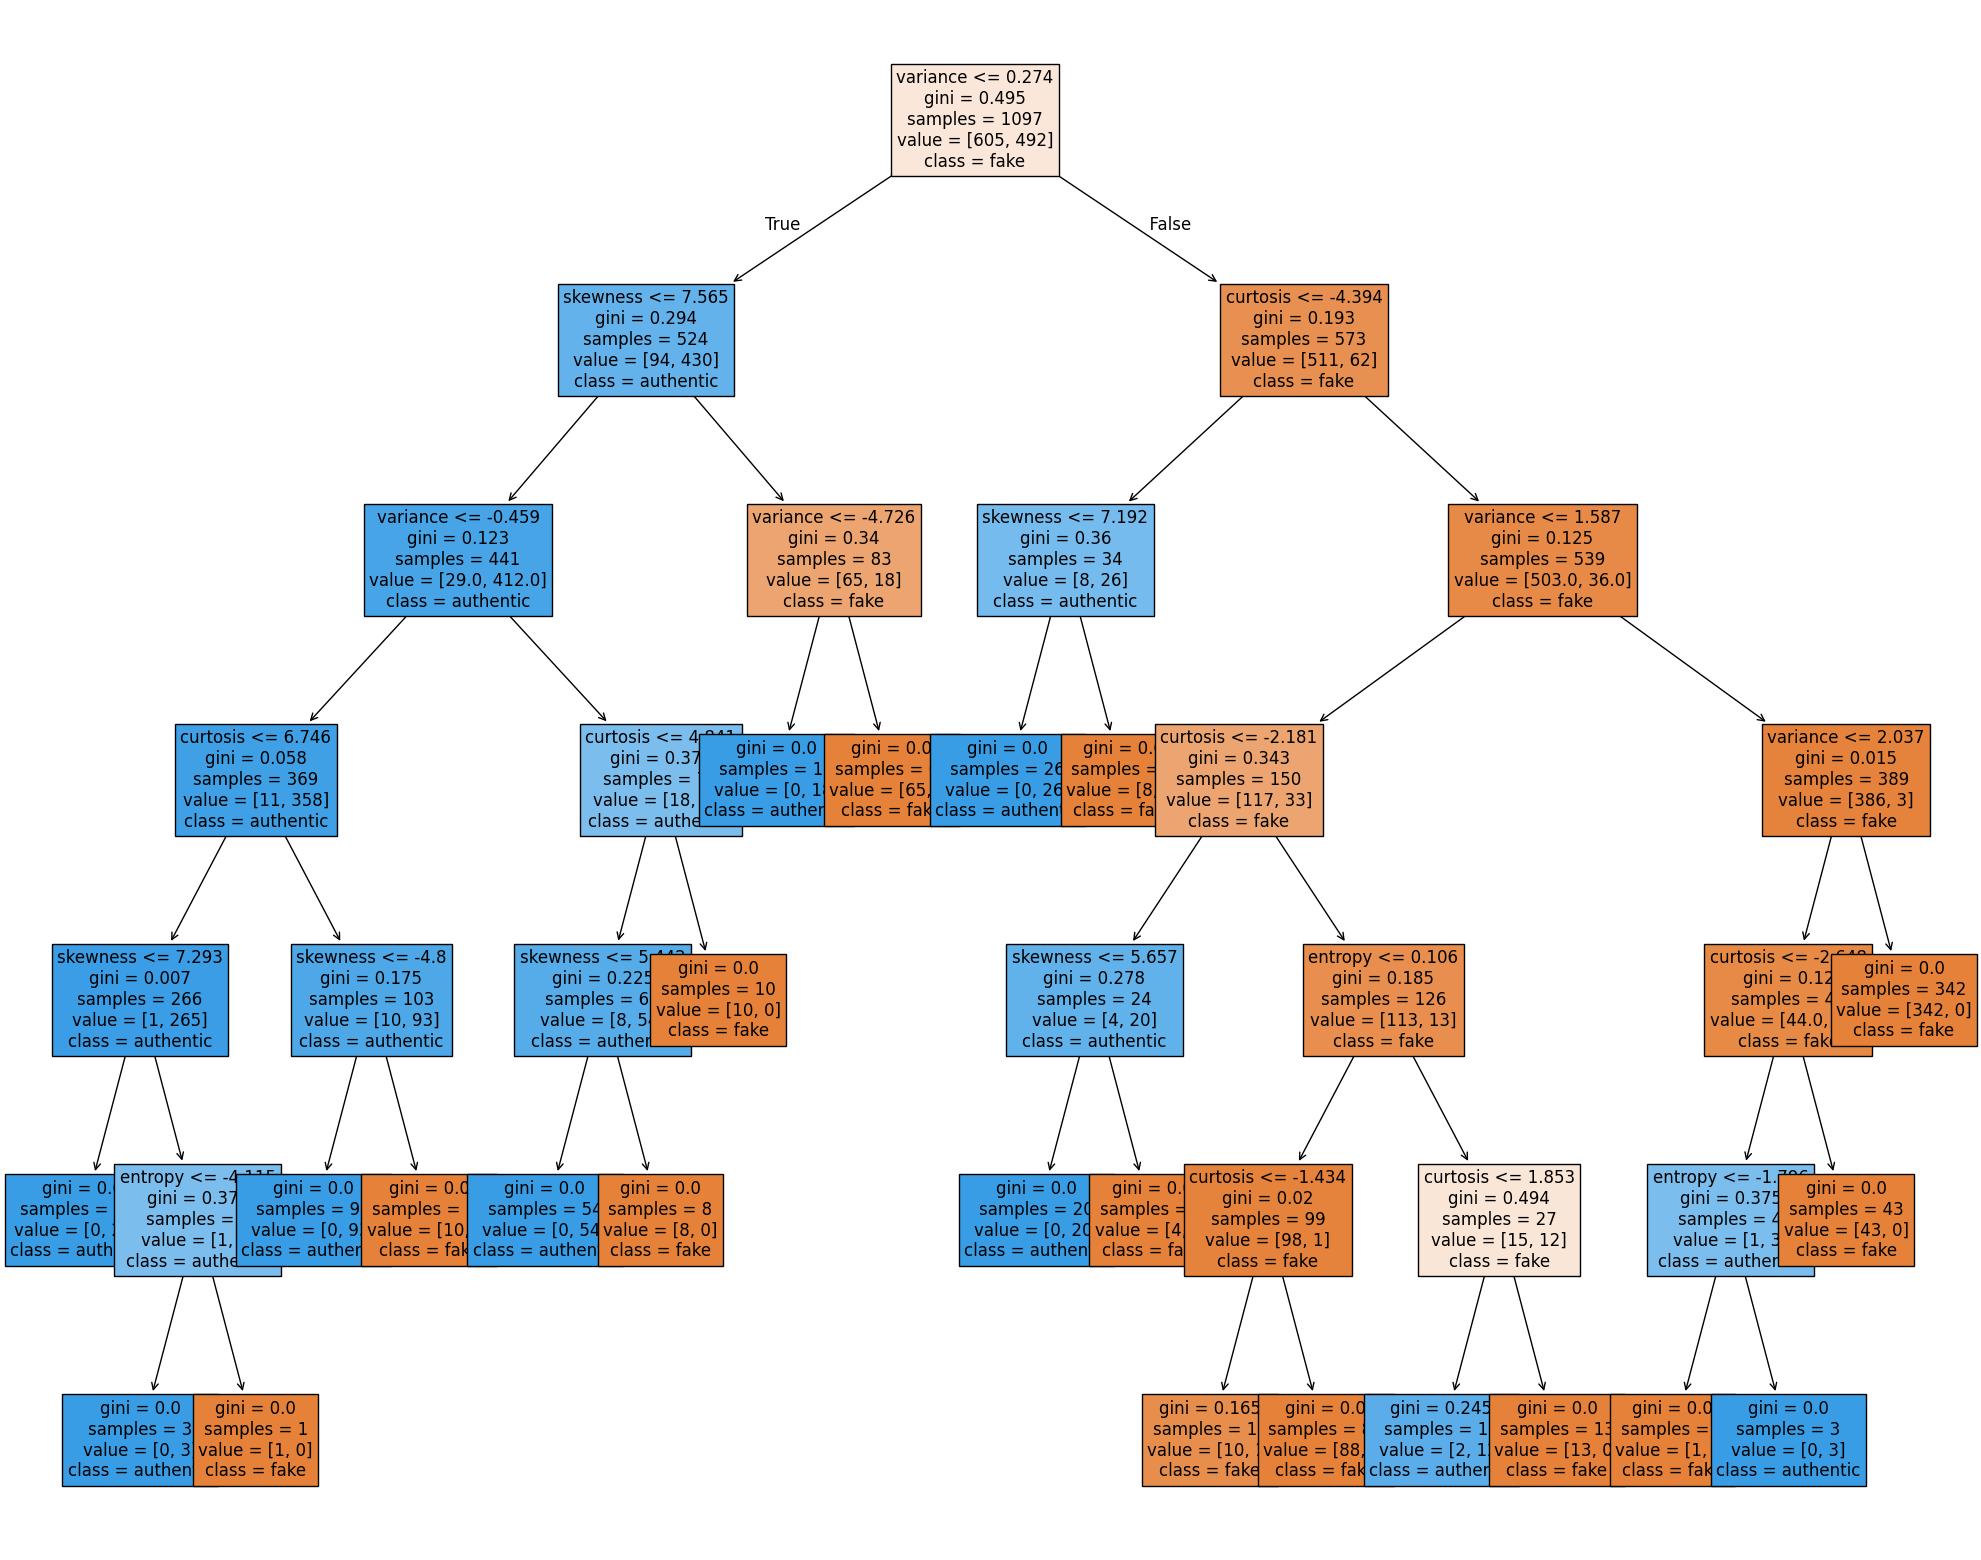

In [37]:
# Plot the decision tree graphically to visualize splits and decisions
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=a.columns,
                   class_names={0:'fake', 1:'authentic'},
                   filled=True,
                  fontsize=12)

In [28]:
# Define parameter grid for GridSearchCV to find best hyperparameters
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Model ve grid search
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid,cv=5,scoring='accuracy',verbose=2)
grid_search.fit(a,b)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_sam

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [29]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Keep only relevant columns (parameters, mean accuracy, etc.) and sort by accuracy
results_df = results_df[[
    'params',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Display all results
print(results_df)

                                               params  mean_test_score  \
27  {'criterion': 'entropy', 'max_depth': None, 'm...         0.987615   
24  {'criterion': 'entropy', 'max_depth': 5, 'min_...         0.986153   
28  {'criterion': 'entropy', 'max_depth': None, 'm...         0.985428   
29  {'criterion': 'entropy', 'max_depth': None, 'm...         0.985428   
25  {'criterion': 'entropy', 'max_depth': 5, 'min_...         0.985425   
26  {'criterion': 'entropy', 'max_depth': 5, 'min_...         0.985425   
13  {'criterion': 'gini', 'max_depth': None, 'min_...         0.981784   
14  {'criterion': 'gini', 'max_depth': None, 'min_...         0.981784   
12  {'criterion': 'gini', 'max_depth': None, 'min_...         0.981784   
21  {'criterion': 'entropy', 'max_depth': 4, 'min_...         0.973025   
23  {'criterion': 'entropy', 'max_depth': 4, 'min_...         0.972297   
22  {'criterion': 'entropy', 'max_depth': 4, 'min_...         0.972297   
11  {'criterion': 'gini', 'max_depth':

In [90]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [91]:
# Make predictions using the best model
y_pred = best_model.predict(x_test)

In [92]:
# Compute accuracy score of predictions from the best model
accuracy_score(y_test,y_pred)

0.9854545454545455